<a href="https://colab.research.google.com/github/financieras/AdventOfCode2021/blob/master/trading2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso de la librería TA-Lib

In [1]:
!pip install talib-binary   # para cargar la librería TA-Lib en el entorno de Colab

     |████████████████████████████████| 2.4 MB 4.9 MB/s 


In [3]:
!pip install yfinance       # para cargar la librería de Yahoo finance en el entorno de Colab
# si da error, ejecutar una segunda vez

In [5]:
import talib as ta                # importamos la librería con el alias ta
import numpy as np
import matplotlib.pyplot as plt   # importamos pyplot de la librería matplotlib con el alias plt
import yfinance as yf             # importamos la librería de Yahoo finance con el alias yf

## Gráficos: Bayesian Methods for Hackers
Uno de los estilos de gráficos de la librería matplotlib es:  
[Bayesian Methods for Hackers style sheet](https://matplotlib.org/stable/gallery/style_sheets/bmh.html?highlight=bmh)

In [6]:
np.random.seed()      # barajamos la serie de aleatorios

plt.style.use('bmh')  # establecemos este estilo de gráficos

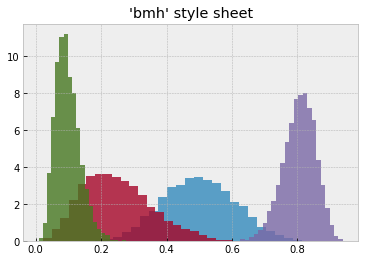

In [7]:
def plot_beta_hist(ax, a, b):
    ax.hist(np.random.beta(a, b, size=10000),
            histtype="stepfilled", bins=25, alpha=0.8, density=True)


fig, ax = plt.subplots()
plot_beta_hist(ax, 10, 10)
plot_beta_hist(ax, 4, 12)
plot_beta_hist(ax, 50, 12)
plot_beta_hist(ax, 6, 55)
ax.set_title("'bmh' style sheet")

plt.show()

In [12]:
# Ticker de Apple AAPL

aapl = yf.download('AAPL', start='2019-1-1', end='2022-3-19' )
print(aapl)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-02   38.722500   39.712502   38.557499   39.480000   38.277527   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.464798   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.936077   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.856098   
2019-01-08   37.389999   37.955002   37.130001   37.687500   36.539616   
...                ...         ...         ...         ...         ...   
2022-03-14  151.449997  154.119995  150.100006  150.619995  150.619995   
2022-03-15  150.899994  155.570007  150.380005  155.089996  155.089996   
2022-03-16  157.050003  160.000000  154.460007  159.589996  159.589996   
2022-03-17  158.610001  161.000000  157.630005  160.619995  160.619995   
2022-03-18  160.509995  164.479996  159.759

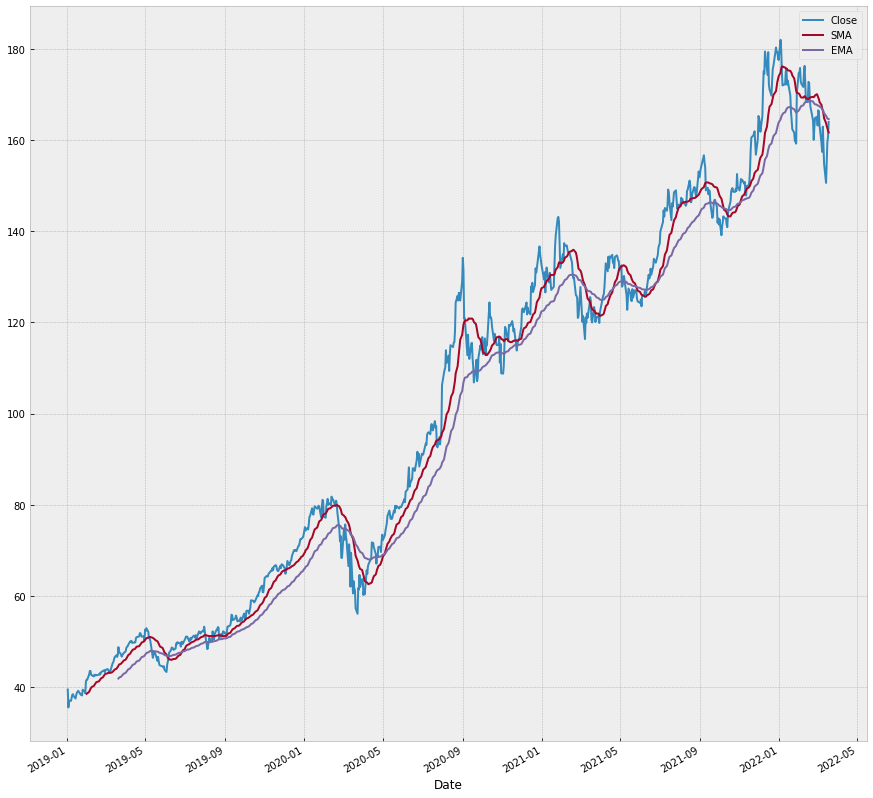

In [14]:
# la media movil es SMA, a usaremos de 21 periodos
aapl['SMA'] = ta.SMA(aapl.Close.values, 21)  # también se puede poner ta.SMA(aapl['Close'])

# la exponencial se llama EMA, la pondremos de 55 periodos
aapl['EMA'] = ta.EMA(aapl.Close.values, 55)

# plot
aapl[['Close', 'SMA', 'EMA']].plot(figsize=(15, 15))
plt.show()